# BitFEAR: Signal Analysis

Experimental analysis and learning using:

* Tweets containing #bitcoin, with Vader sentiment scores
* Tweet volume for #bitcoin
* Google Trends data
* Deribit Bitcoin Options orderbook data

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

from pytrends.request import TrendReq
from google.cloud import firestore
from google.cloud import storage

In [33]:
plt.rcParams["figure.figsize"] = (16, 10)

### Getting tweets from Google Cloud Storage

In [14]:
db = firestore.Client()
tweets_ref = db.collection('tweet_data_#bitcoin')
tweets = list()
for doc in tweets_ref.stream():
    tweets.append(doc.to_dict())

In [15]:
tweets_df = pd.DataFrame(tweets)

In [16]:
tweets_df.head()

,sentiment_rating,created,tweet_id,text,sentiment_scores,text_clean,user_id
0,0,2020-03-09 19:43:06+00:00,1237101627925987329,"Ooh, a double-whammy buy signal day.","{'neu': 1.0, 'pos': 0.0, 'neg': 0.0, 'compound...","Ooh, a double-whammy buy signal day.",116270443
1,1,2020-03-09 19:43:20+00:00,1237101685757087744,The latest The Crypto Currency Daily! https://...,"{'compound': 0.4926, 'neu': 0.738, 'pos': 0.26...",The latest The Crypto Currency Daily! Thanks ...,2372242398
2,1,2020-03-09 19:43:26+00:00,1237101710935392256,The latest The Blockchain Daily! https://t.co/...,"{'neu': 0.715, 'pos': 0.285, 'neg': 0.0, 'comp...",The latest The Blockchain Daily! Thanks to ...,1075804135524585473
3,0,2020-03-09 19:43:30+00:00,1237101728488718336,Call me oracle kek $BTC #Bitcoin https://t.co/...,"{'pos': 0.0, 'neg': 0.0, 'compound': 0.0, 'neu...",Call me oracle kek $BTC #Bitcoin,877210351301001216
4,1,2020-03-09 19:43:32+00:00,1237101736650661888,Interesting. The narrative is getting the publ...,"{'compound': 0.4019, 'neu': 0.838, 'pos': 0.16...",Interesting. The narrative is getting the publ...,1153377427034259457


### Calculating tweet volume

In [65]:
tweets_time_df = tweets_df.set_index('created').filter(['tweet_id'])
tweets_time_df.head()

,tweet_id
created,
2020-03-09 19:43:06+00:00,1237101627925987329
2020-03-09 19:43:20+00:00,1237101685757087744
2020-03-09 19:43:26+00:00,1237101710935392256
2020-03-09 19:43:30+00:00,1237101728488718336
2020-03-09 19:43:32+00:00,1237101736650661888


In [66]:
tweet_volume = tweets_time_df.groupby(pd.Grouper(freq='60Min')).count()
tweet_volume.head()

,tweet_id
created,
2020-03-09 19:00:00+00:00,112
2020-03-09 20:00:00+00:00,322
2020-03-09 21:00:00+00:00,325
2020-03-09 22:00:00+00:00,290
2020-03-09 23:00:00+00:00,257


Text(0, 0.5, 'Volume')

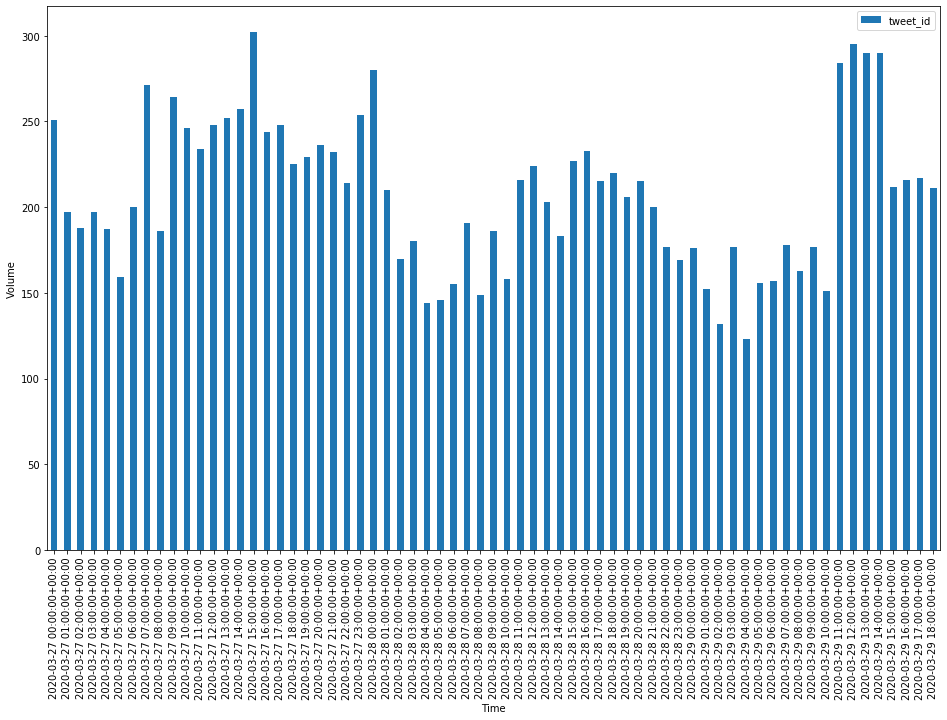

In [69]:
plot_start_date = '2020-03-27'

ax = hist.loc[plot_start_date:].plot(kind='bar')
ax.set_xlabel('Time')
ax.set_ylabel('Volume')

### Google Trends Data

In [73]:
focus_words = ['bitcoin']

In [83]:
pygt = TrendReq()
pygt.build_payload(kw_list=focus_words)

interest_over_time_df = pygt.interest_over_time()
del interest_over_time_df['isPartial']
interest_over_time_df.tail()

,bitcoin
date,
2020-02-23,11
2020-03-01,10
2020-03-08,19
2020-03-15,20
2020-03-22,16


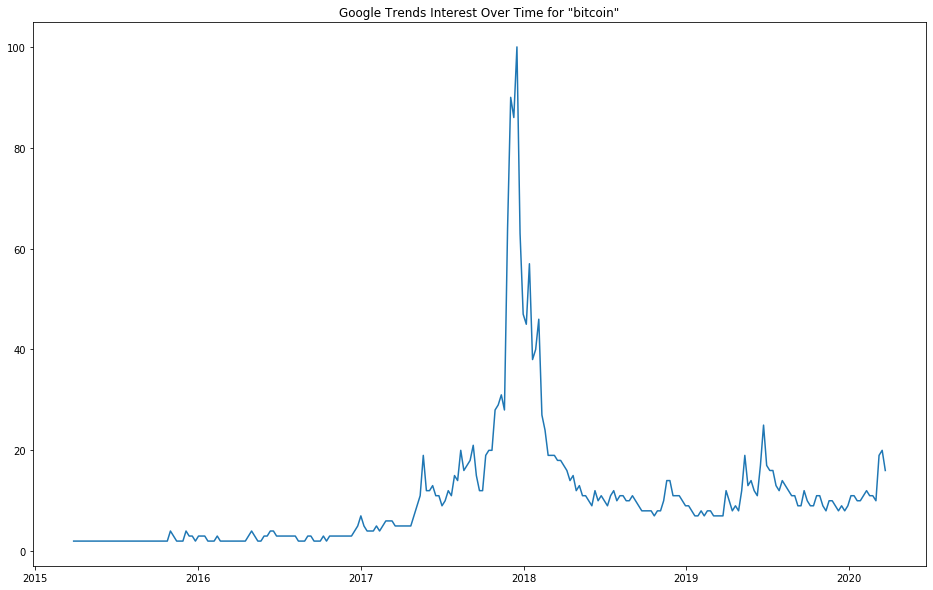

In [84]:
plot = plt.plot(interest_over_time_df)
plt.title('Google Trends Interest Over Time for "bitcoin"')
plt.show()

In [85]:
historical_hourly_interest_df = pygt.get_historical_interest(focus_words, year_start=2020, month_start=3, day_start=1, hour_start=0, year_end=2020, month_end=3, day_end=28, hour_end=0)
del historical_hourly_interest_df['isPartial']
historical_hourly_interest_df.head()

,bitcoin
date,
2020-03-15 00:00:00,0
2020-03-15 01:00:00,0
2020-03-15 02:00:00,0
2020-03-15 03:00:00,0
2020-03-15 04:00:00,0


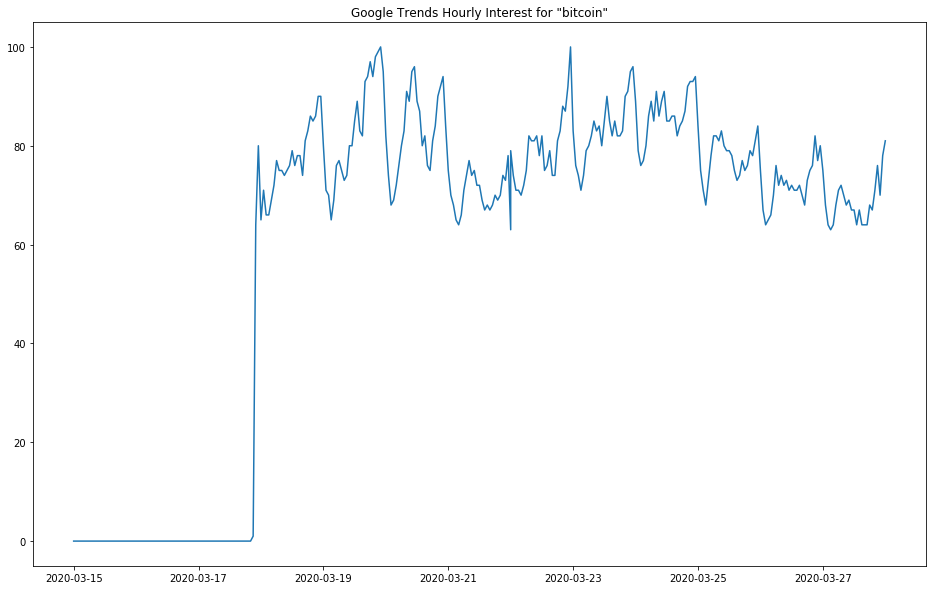

In [86]:
plot = plt.plot(historical_hourly_interest_df)
plt.title('Google Trends Hourly Interest for "bitcoin"')
plt.show()